In [1]:
import scipy
from scipy.optimize import linprog
#scipy.__version__

import requests
import pandas as pd
from time import time,sleep

# JSON Live Station Data

In [2]:
station_info_response = requests.get("https://gbfs.citibikenyc.com/gbfs/en/station_information.json").json()
station_info = pd.DataFrame(station_info_response['data']['stations'])[["station_id","name","lon","lat"]]

station_status_response = requests.get("https://gbfs.citibikenyc.com/gbfs/en/station_status.json").json()
station_status = pd.DataFrame(station_status_response['data']['stations'])[["station_id","num_docks_available","num_bikes_available","num_bikes_disabled","station_status"]]


In [3]:
station_info.head(5)

station_id                           name        lon        lat
0         72               W 52 St & 11 Ave -73.993929  40.767272
1         79       Franklin St & W Broadway -74.006667  40.719116
2         82         St James Pl & Pearl St -74.000165  40.711174
3         83  Atlantic Ave & Fort Greene Pl -73.976323  40.683826
4        116                W 17 St & 8 Ave -74.001497  40.741776

In [4]:
station_status.head(5)

station_id  num_docks_available  num_bikes_available  num_bikes_disabled  \
0         72                   17                    0                   0   
1         79                   11                   20                   2   
2         82                   11                   13                   3   
3         83                    4                   57                   0   
4        116                   13                   61                   0   

   station_status  
0  out_of_service  
1          active  
2          active  
3          active  
4          active

In [5]:
station_status = station_status[station_status["station_status"] != "out_of_service"]

In [6]:
station_merged = pd.merge(station_status,station_info,how='left')

In [7]:
station_merged.head(5)

station_id  num_docks_available  num_bikes_available  num_bikes_disabled  \
0         79                   11                   20                   2   
1         82                   11                   13                   3   
2         83                    4                   57                   0   
3        116                   13                   61                   0   
4        119                    3                   50                   0   

  station_status                           name        lon        lat  
0         active       Franklin St & W Broadway -74.006667  40.719116  
1         active         St James Pl & Pearl St -74.000165  40.711174  
2         active  Atlantic Ave & Fort Greene Pl -73.976323  40.683826  
3         active                W 17 St & 8 Ave -74.001497  40.741776  
4         active       Park Ave & St Edwards St -73.978034  40.696089

In [8]:
station_merged["station capacity"] = station_merged["num_bikes_available"] + station_merged["num_docks_available"]

In [9]:
station_merged.head(5)

station_id  num_docks_available  num_bikes_available  num_bikes_disabled  \
0         79                   11                   20                   2   
1         82                   11                   13                   3   
2         83                    4                   57                   0   
3        116                   13                   61                   0   
4        119                    3                   50                   0   

  station_status                           name        lon        lat  \
0         active       Franklin St & W Broadway -74.006667  40.719116   
1         active         St James Pl & Pearl St -74.000165  40.711174   
2         active  Atlantic Ave & Fort Greene Pl -73.976323  40.683826   
3         active                W 17 St & 8 Ave -74.001497  40.741776   
4         active       Park Ave & St Edwards St -73.978034  40.696089   

   station capacity  
0                31  
1                24  
2                61  
3                74  
4                53

In [10]:
station_merged = station_merged[station_merged["station capacity"] > 8]

In [11]:
print(station_info.shape)
print(station_status.shape)
print(station_merged.shape)

(1795, 4)
(1719, 5)
(1692, 9)


In [12]:
df = station_merged.rename(columns={'station_id': 'Station names', 'num_bikes_available': 'bike count in an hour' , 
                                   'lon': 'y cord', 'lat': 'x cord'})

In [13]:
#df = df.iloc[900:1000]

In [14]:
df = df.sample(n = 470)

In [15]:
df

Station names  num_docks_available  bike count in an hour  \
1677          4920                   21                      1   
834           3874                    5                     11   
827           3867                   24                      5   
635           3585                   23                      1   
1387          4520                   11                     11   
...            ...                  ...                    ...   
832           3872                   14                      5   
184            471                    4                     25   
134            398                    8                     25   
1229          4339                    2                     59   
1593          4775                   23                      2   

      num_bikes_disabled station_status  \
1677                   0         active   
834                    0         active   
827                    0         active   
635                    0         active   
1387                   0         active   
...                  ...            ...   
832                    0         active   
184                    1         active   
134                    4         active   
1229                   2         active   
1593                   0         active   

                                        name     y cord     x cord  \
1677               MacDonough St & Marcy Ave -73.946130  40.680780   
834                  Menahan St & Seneca Ave -73.910540  40.704610   
827                     Somers St & Broadway -73.904740  40.679450   
635                   Union St & Bedford Ave -73.955416  40.669178   
1387  Mama Johnson Field - 4 St & Jackson St -74.040041  40.743140   
...                                      ...        ...        ...   
832                 Hancock St & Wyckoff Ave -73.906740  40.697200   
184                  Grand St & Havemeyer St -73.956981  40.712868   
134                 Atlantic Ave & Furman St -73.999979  40.691652   
1229                   Forsyth St & Grand St -73.993161  40.717798   
1593                     40 St & Queens Blvd -73.924352  40.743540   

      station capacity  
1677                22  
834                 16  
827                 29  
635                 24  
1387                22  
...                ...  
832                 19  
184                 29  
134                 33  
1229                61  
1593                25  

[470 rows x 9 columns]

In [16]:
df.shape

(470, 9)

# Test data_set up
The LP with 1000 stations takes considerably long. The Heuristic model should be used for less optimized but a faster model.

In [17]:
df.head(5)

Station names  num_docks_available  bike count in an hour  \
1677          4920                   21                      1   
834           3874                    5                     11   
827           3867                   24                      5   
635           3585                   23                      1   
1387          4520                   11                     11   

      num_bikes_disabled station_status  \
1677                   0         active   
834                    0         active   
827                    0         active   
635                    0         active   
1387                   0         active   

                                        name     y cord     x cord  \
1677               MacDonough St & Marcy Ave -73.946130  40.680780   
834                  Menahan St & Seneca Ave -73.910540  40.704610   
827                     Somers St & Broadway -73.904740  40.679450   
635                   Union St & Bedford Ave -73.955416  40.669178   
1387  Mama Johnson Field - 4 St & Jackson St -74.040041  40.743140   

      station capacity  
1677                22  
834                 16  
827                 29  
635                 24  
1387                22

In [18]:
equilibrium_percent = df["bike count in an hour"].sum() / df["station capacity"].sum()
equilibrium_percent

0.4621708133275135

In [19]:
df["give_away_stock"] = -(round(df["station capacity"] * equilibrium_percent) - df["bike count in an hour"])

In [20]:
df.head(5)

Station names  num_docks_available  bike count in an hour  \
1677          4920                   21                      1   
834           3874                    5                     11   
827           3867                   24                      5   
635           3585                   23                      1   
1387          4520                   11                     11   

      num_bikes_disabled station_status  \
1677                   0         active   
834                    0         active   
827                    0         active   
635                    0         active   
1387                   0         active   

                                        name     y cord     x cord  \
1677               MacDonough St & Marcy Ave -73.946130  40.680780   
834                  Menahan St & Seneca Ave -73.910540  40.704610   
827                     Somers St & Broadway -73.904740  40.679450   
635                   Union St & Bedford Ave -73.955416  40.669178   
1387  Mama Johnson Field - 4 St & Jackson St -74.040041  40.743140   

      station capacity  give_away_stock  
1677                22             -9.0  
834                 16              4.0  
827                 29             -8.0  
635                 24            -10.0  
1387                22              1.0

In [21]:
import itertools
cross_product = list(itertools.product(df["Station names"],df["Station names"]))
station_combinations = ["_".join([i,b]) for i,b in cross_product if i != b]

In [22]:
station_combinations[0:10] #a_b represents the path from a to b

['4920_3874',
 '4920_3867',
 '4920_3585',
 '4920_4520',
 '4920_479',
 '4920_4664',
 '4920_3293',
 '4920_3462',
 '4920_3067',
 '4920_3268']

In [23]:
len(station_combinations)

220430

In [24]:
cross_product = list(itertools.product(zip(df["Station names"],df["x cord"],df["y cord"]),zip(df["Station names"],df["x cord"],df["y cord"]) ))
x_cord_diff = [ abs(i[1]-b[1]) for i,b in cross_product if i[0] != b[0]]
y_cord_diff = [ abs(i[2]-b[2]) for i,b in cross_product if i[0] != b[0]]

In [25]:
distance_combinations = [sum(i) for i in zip(x_cord_diff, y_cord_diff )] 

In [26]:
distance_combinations[1:10]

[0.042719999999988545,
 0.02088790000000529,
 0.1562709095048973,
 0.12453762000000523,
 0.05889300000000475,
 0.13909000000000304,
 0.09566102253621978,
 0.0232853999999989,
 0.1494123486302783]

In [27]:
len(station_combinations)

220430

In [28]:
len(distance_combinations)

220430

# LP formulation


$\textbf{Objective function:}$

\begin{equation*}
{\begin{array}{1ll}
\small\text{Minimize} \Large\sum\limits_{i}^{A} \sum\limits_{j}^{A}S_{ij} \times x_{ij} & \small\text{where i $\neq$ j} \\
& \small\text{$S_{ij}$: Transfer realtion indicating an allocation instance between station i and j } \\[2pt]
& \small\text{A: All stations ordered alphabetically} \\[2pt]
& \small\text{$x_{ij}$: Rectlinear distance between station i and j} \\[2pt]
\end{array}}
\end{equation*}


$\textbf{Constraints Pre Explanation:}$

$\small\text{$\phi_i({D_i})$ can be defined as the variable vector of station "i" that consist of $\sum\limits_{}^{} f_{in} - \sum\limits_{}^{}f_{out}$ or vice versa (based on the demand of station i) where $f_i$ can be def-}$
$\small\text{ined as flow in or out from the station i  }$

\begin{equation}
\phi_i({D_i})=
\begin{cases}
      \Large\sum\limits_{j}^{A} S_{ji} - S_{ij}  & D_i \leq 0 & \small\text{for all i in A} \\
       \Large\sum\limits_{j}^{A} S_{ij} - S_{ji}   & D_i \geq 0 & \small\text{for all i in A}
\end{cases}
\end{equation}

\begin{equation*}
{\begin{array}{1ll}
\small\text{$S_{ij}$: Transfer realtion indicating an allocation instance between station i and j } \\
\small\text{$D_i$: Bike demand of station i for reaching the equilibrium}
\end{array}}
\end{equation*} $\newline$
$$\small\text{The purpose is to balance the bikes in the system by equalizing all stations' final stock to the $\textit{Equilibrium Capacity}$ = $\epsilon$  }$$

$$\large\text{ $\epsilon$ = $\frac{\sum\limits_{i}^{A} b_i }{\sum\limits_{i}^{A} C_i }$}$$

$$\small\text{$b_i$: Initial bike count in the station i}$$
$$\small\text{$C_i$: Max bike capacity of station i }$$



$\textbf{Constraints (Upper Bound):}$

$$\small\text{ $\alpha$: Elasticity coefficent allowes $\%$ flexibility from $\epsilon$  }$$ 


$$\Large\text{ $\frac{b_i + \phi_i({D_i}) }{C_i}$  $\leq$ $\epsilon$ + $\alpha$  $\small\text{   for all i that is elements of A }$}$$ 



$$\Large\text{ $\frac{b_i + \phi_i({D_i}) }{C_i}$  $\geq$ $\epsilon$ - $\alpha$ $\small\text{   for all i that is elements of A }$}$$


$\small\text{Lower bound is not used in Spicy Linprog, conversion to lower bound is needed. Since Spicy is set up so that any addition or substraction would vi-}$ 
$\small\text{olate the "0 coefficent" of unused decision variable instance, algebraic work is required to break up the equation and simplify for $\phi_i({D_i})$ }$ 


$$\Large\text{ Upper Bound: $\frac{\phi_i({D_i}) }{C_i}$  $\leq$  |$\epsilon$ - $\frac{b_i }{C_i}$| + $\alpha$ $\small\text{   for all i that is elements of A }$}$$


$$\Large\text{ Lower Bound: $-$ $\frac{\phi_i({D_i}) }{C_i}$  $\leq$  $-$ |$\epsilon$ - $\frac{b_i }{C_i}$| + $\alpha$ $\small\text{   for all i that is elements of A }$}$$


$\textbf{Nonnegativity :}$

$$\large\text{ S_i $\hspace{0.1cm}$ $\geq$ $\hspace{0.1cm}$ 0      $\hspace{3cm}$ for all i in A}$$


In [29]:
## ============================================== ##
## Decision Variables                             ## 
## ============================================== ##
VarName = station_combinations

## ============================================== ##
## Objective function coefficients (minimization) ## 
## ============================================== ##
c = distance_combinations


In [30]:
VarName[1:10]

['4920_3867',
 '4920_3585',
 '4920_4520',
 '4920_479',
 '4920_4664',
 '4920_3293',
 '4920_3462',
 '4920_3067',
 '4920_3268']

In [31]:
len(c)

220430

In [32]:
c[1:10]

[0.042719999999988545,
 0.02088790000000529,
 0.1562709095048973,
 0.12453762000000523,
 0.05889300000000475,
 0.13909000000000304,
 0.09566102253621978,
 0.0232853999999989,
 0.1494123486302783]

In [33]:
## ============================================== ##
## Upper Bound constraints                        ## 
## ============================================== ##
import numpy as np
A_ub, b_ub = [], []
alpha = 0.05

In [34]:
start_of_all = time()
index_a = {}
index_b = {}
for i, s in enumerate(VarName):
    a, b = s.split("_")
    index_a.setdefault(a, []).append(i)
    index_b.setdefault(b, []).append(i)
print(time() - start_of_all )  

0.14780092239379883


In [35]:
start_of_all = time()
for i in range(len(df.index)):
    df_instance = df.iloc[i]
    give_away_stock = df_instance["give_away_stock"]
    station_name = df_instance["Station names"]
    station_capacity = df_instance["station capacity"]
    current_capacity = df_instance["bike count in an hour"]
    
#     print("dataframes:")
#     print(time() - start_of_all ) 
    
    temp_array = np.zeros(shape = len(c),dtype=int)
#     print("temparray:")
#     print(time() - start_of_all ) 
    
    reverse_indexes = index_b.get(station_name, [])
    regular_indexes = index_a.get(station_name, [])
    
    #print(reverse_indexes)
    
#     print("indexes:")
#     print(time() - start_of_all ) 

    if give_away_stock < 0:

        temp_array[reverse_indexes] = 1
        temp_array[regular_indexes] = -1
        
        
    elif give_away_stock > 0:
        
        temp_array[reverse_indexes] = -1
        temp_array[regular_indexes] = 1
 
    else:
        temp_array[reverse_indexes] = 1
        temp_array[regular_indexes] = -1

    #print("if conditions:")
    #print(time() - start_of_all ) 
    
    A_ub.append((temp_array/station_capacity) )
    b_ub.append((abs(equilibrium_percent - (current_capacity/station_capacity)) + alpha))
    
    
    A_ub.append( -(temp_array/station_capacity) )
    b_ub.append(-(abs(equilibrium_percent - (current_capacity/station_capacity)) - alpha))

    #print("appends:")
    #print(time() - start_of_all ) 
print(time() - start_of_all ) 

0.7320330142974854


In [36]:
## ============================================== ##
## Nonnegativity                                  ## 
## ============================================== ##
lbs = [0]*len(c)
ubs = [None]*len(c)
bounds = [(lb, ub) for lb, ub in zip(lbs, ubs)]

In [37]:
## ============================================== ##
## Print optimization result                      ## 
## ============================================== ##
res = linprog(c, A_ub = A_ub, b_ub = b_ub, bounds = bounds, method = 'highs')
print(res.message)
print("Minimized objective function value := ", res.fun)
print("Optimal solution:")
#for x, vn in zip(res.x, VarName):
#    print(vn, " := ", x)

Optimization terminated successfully.
Minimized objective function value :=  75.31796559217842
Optimal solution:


# Allocation Report

$S_1\_S_2 = N$ is read transfer N bikes from $S_1$ to $S_2 $

In [38]:
[[var,value] for value,var in zip(res.x, VarName) if value > 0][0:10]

[['3874_3885', 4.405266986759784],
 ['4664_3587', 2.732242106794703],
 ['3067_3059', 4.006903826567729],
 ['3067_3823', 11.365124399825405],
 ['3268_4633', 1.145053106358215],
 ['3268_3679', 0.6845555070565973],
 ['4626_4509', 4.75658373344973],
 ['4459_4471', 0.7980066928561063],
 ['4459_4506', 0.9585770405936243],
 ['4019_4207', 4.983631601920552]]

In [39]:
allocations_report = [[var,round(value)] for value,var in zip(res.x, VarName) if round(value) > 0]

In [40]:
allocations_report

[['3874_3885', 4],
 ['4664_3587', 3],
 ['3067_3059', 4],
 ['3067_3823', 11],
 ['3268_4633', 1],
 ['3268_3679', 1],
 ['4626_4509', 5],
 ['4459_4471', 1],
 ['4459_4506', 1],
 ['4019_4207', 5],
 ['3414_4504', 25],
 ['4703_3687', 11],
 ['343_397', 4],
 ['4979_4807', 3],
 ['4979_4765', 1],
 ['4979_4797', 3],
 ['416_397', 1],
 ['319_4595', 2],
 ['3778_3871', 11],
 ['3798_456', 12],
 ['3798_3623', 13],
 ['3161_3509', 2],
 ['3161_3944', 12],
 ['3764_3904', 4],
 ['4279_3984', 1],
 ['4279_3378', 4],
 ['4279_3598', 1],
 ['331_397', 6],
 ['331_244', 3],
 ['4492_4495', 4],
 ['3716_4310', 1],
 ['3716_3586', 2],
 ['532_4918', 7],
 ['532_4902', 5],
 ['532_3837', 2],
 ['532_3770', 3],
 ['4473_4576', 3],
 ['4473_4564', 3],
 ['4473_4578', 3],
 ['4473_4609', 2],
 ['3648_3866', 2],
 ['266_3286', 6],
 ['266_4110', 2],
 ['3923_4612', 3],
 ['4422_4419', 2],
 ['4422_4400', 6],
 ['4993_3500', 7],
 ['4993_3602', 2],
 ['4993_4283', 6],
 ['4728_4111', 13],
 ['3526_4322', 3],
 ['3588_3612', 4],
 ['3588_4312', 4],
 

# Report Summary

In [44]:

objective = 0
total_bikes_transfered = 0
for i,j in allocations_report:
    objective += c[VarName.index(i)] * j
    total_bikes_transfered += j
    
print(f'New Objective: {objective}')
print(f'Total Bikes Allocated: {total_bikes_transfered}')

New Objective: 75.46631076968949
Total Bikes Allocated: 2042


In [45]:
average_allocation_per_bike = (objective/total_bikes_transfered) * 111

In [46]:
average_allocation_per_bike #in km

4.102233347421906

# Allocation Graph

In [47]:
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt
import pylab


## Adding Nodes

In [48]:
G = nx.DiGraph()
for i in df['Station names']:
    G.add_node(i)


## Adding Edges

In [49]:
edge_array = [ [transfer.split("_")[0] ,transfer.split("_")[1], weight] for transfer, weight in allocations_report]
print(edge_array[0])

['3874', '3885', 4]


In [50]:
#Setting all the edge relations among nodes
for s_from,s_to,b_weight in edge_array:
    if b_weight > 0:
        G.add_edges_from([(s_from, s_to)], weight=b_weight)

## Format

In [51]:
nodeopt = {
    'node_size' : 1400,
    'node_color': 'white',
    'node_shape': 'o',
    'linewidths': 1,
    'edgecolors' : 'black'
}

label_opt = {
    'font_size': 13,
    'font_color' : 'black',
}

edge_opt = {
    'width': 3,
    'edge_color' : 'black',
    'arrowstyle' : '-|>',
    'arrows' : True,
    'arrowsize' : 22,
    'connectionstyle' : 'arc3,rad=0.0',
    'node_size' : 1400
    
}

edge_label_opt = {
    'font_size': 12,
    'font_color' : 'black',
    'label_pos' : 0.5,
    'bbox' : dict(
            boxstyle='round', ec= 'black',
            alpha=0.9, lw=1.5, fc = 'white'),
    'horizontalalignment' : 'center',
    'verticalalignment' : 'center_baseline'
    
}


## Setting positions

In [53]:
pos = nx.spring_layout(G)

In [54]:
for i in df['Station names']:
    df_row = df[df["Station names"] == i]
    pos[i] = [df_row["x cord"].tolist()[0],df_row["y cord"].tolist()[0]]
    


In [68]:
print(f'Coordinate of the station 4920 as an example : {pos["4920"]} ')

Coordinate of the station 4920 as an example : [40.68078, -73.94613] 


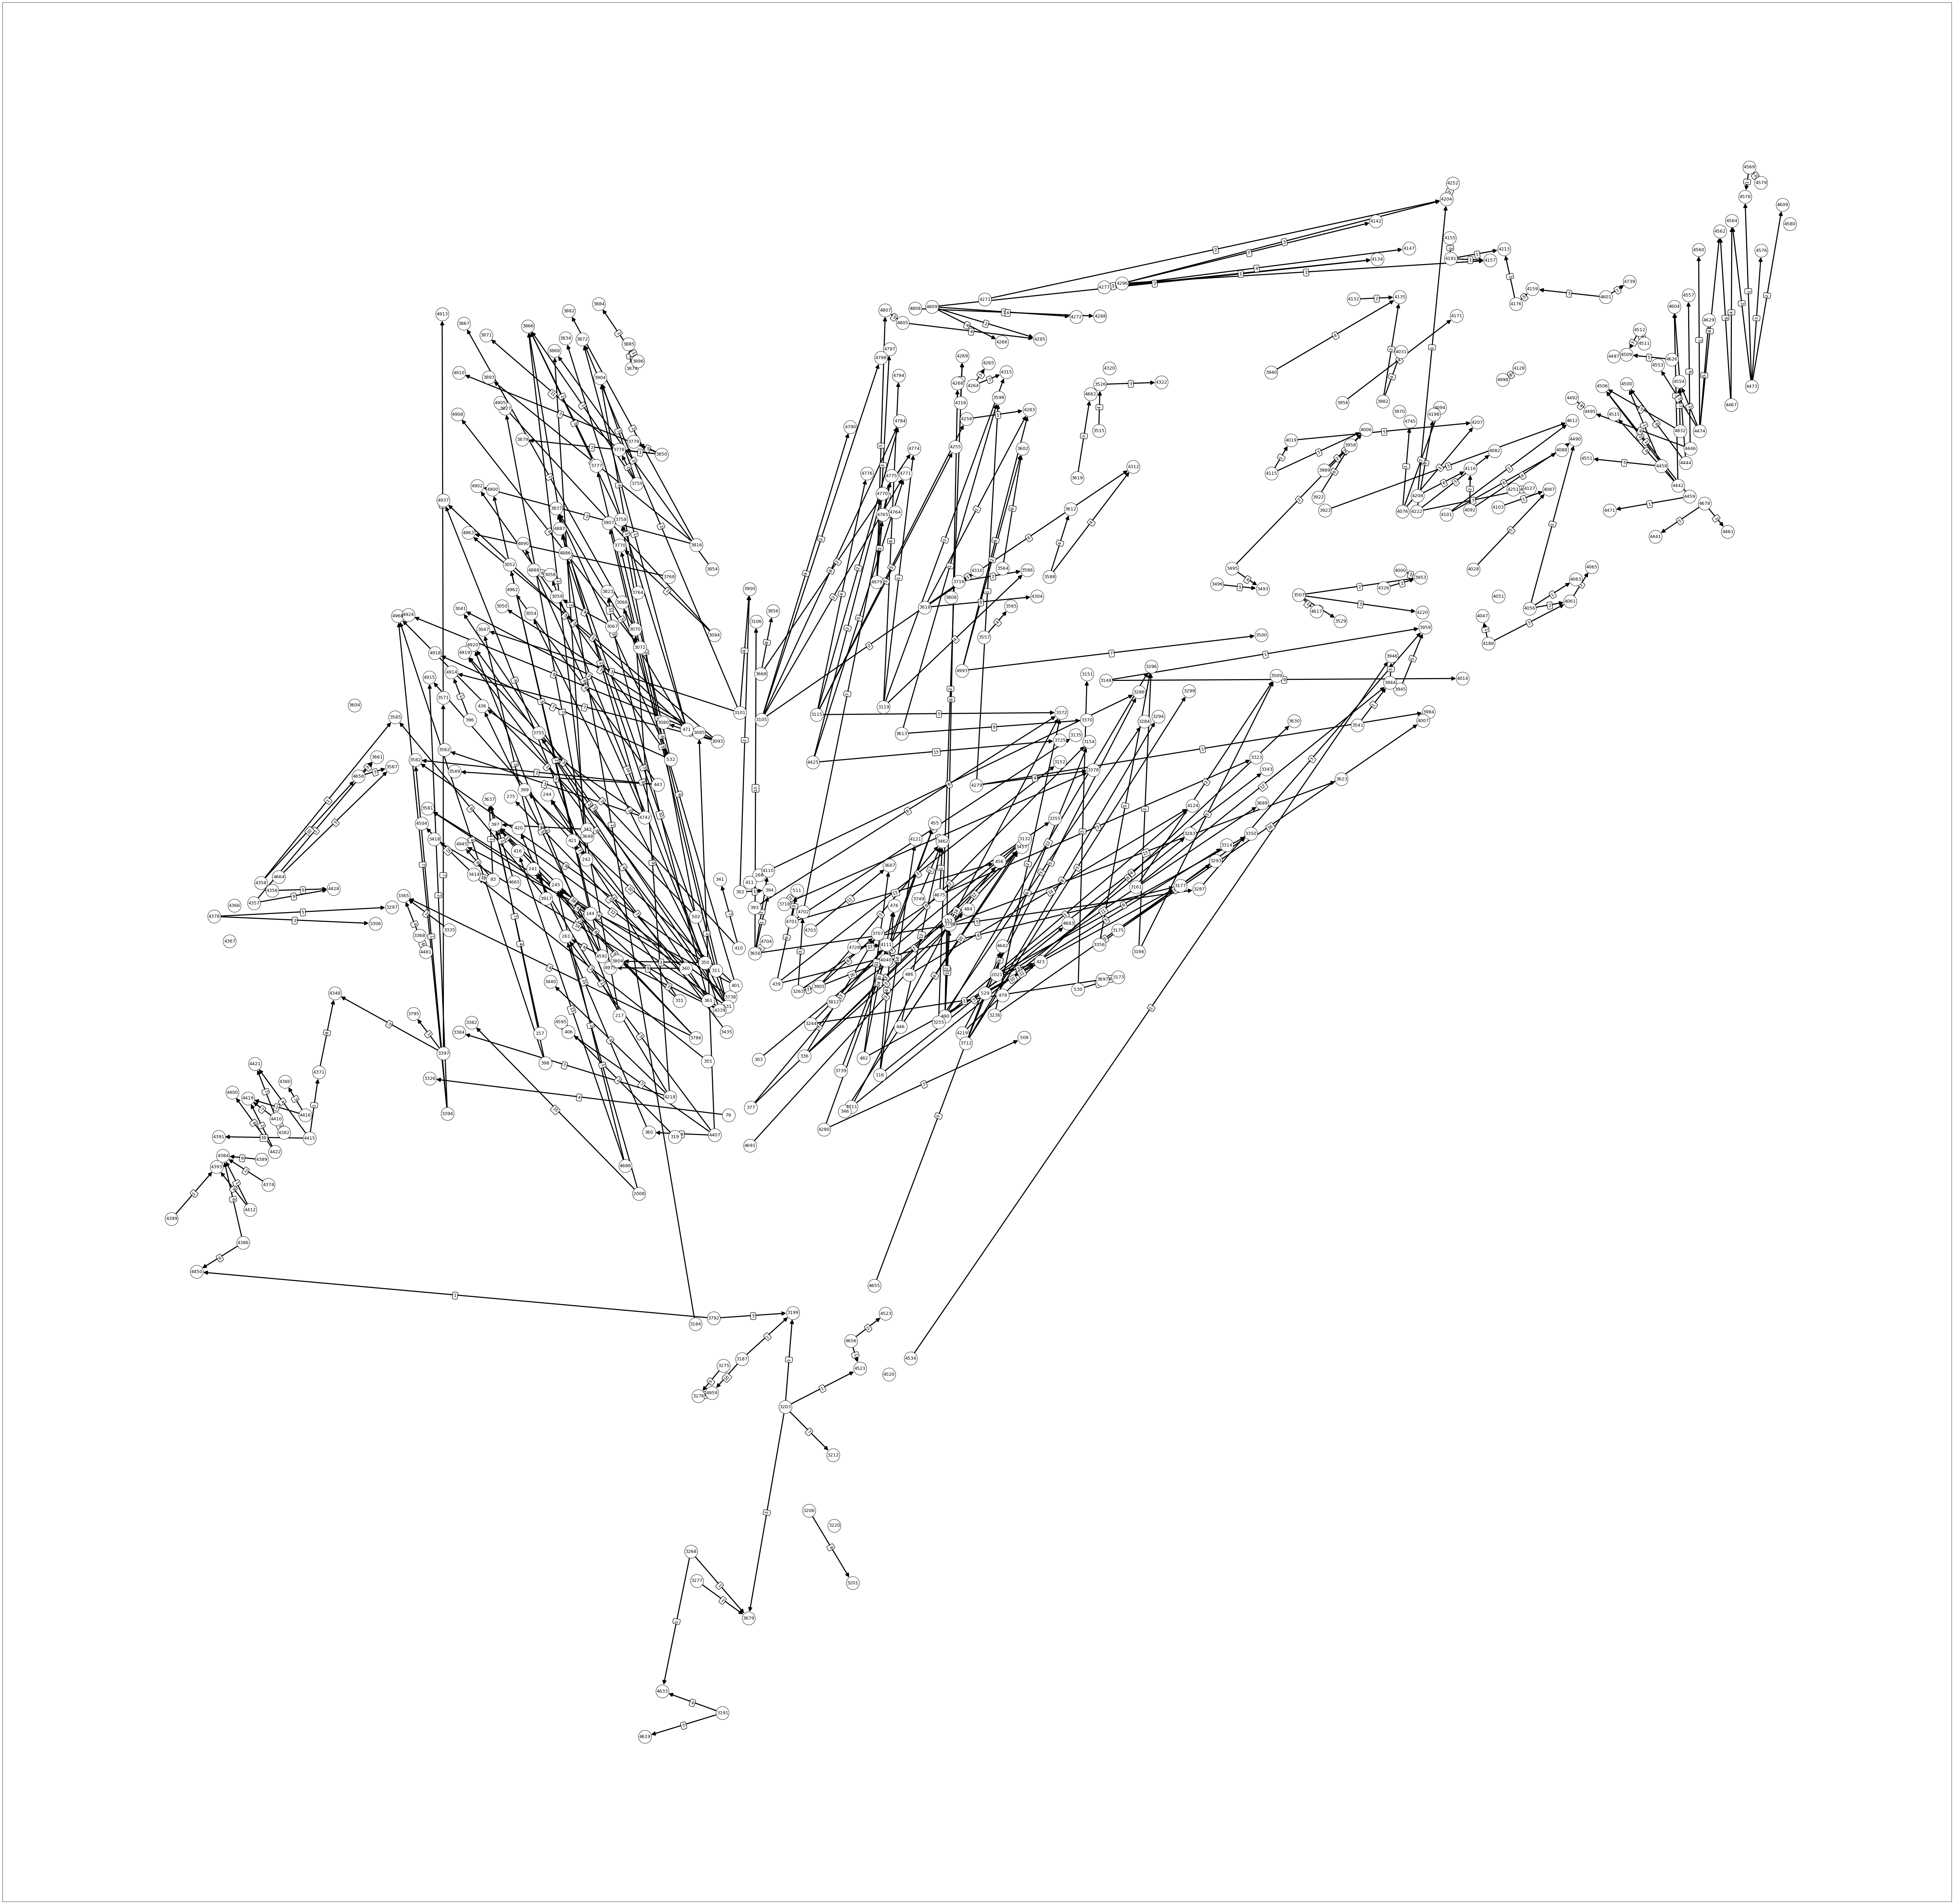

In [69]:
plt.rcParams['figure.figsize'] = [100, 100]
##FOR PRINTING WEIGHTS ON THE EDGES
edge_labels=dict([((u,v,),d['weight'])
                 for u,v,d in G.edges(data=True)])

## EDIT THE EDGE COLORS 
red_edges = []
edge_colors = ['black' if not edge in red_edges else 'red' for edge in G.edges()]
#red_edges = [('C','D'),('D','A')]
#edge_colors = ['black' if not edge in red_edges else 'red' for edge in G.edges()]

## FOR CREATING LABELS OF THE NODES 
node_labels = {node:node for node in G.nodes()}; 

nx.draw_networkx_nodes(G,pos,**nodeopt)

nx.draw_networkx_labels(G, pos, labels=node_labels, **label_opt)

nx.draw_networkx_edges(G, pos, **edge_opt) 

nx.draw_networkx_edge_labels(G,pos,edge_labels=edge_labels, **edge_label_opt)

pylab.show()